Importing the Modules

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize

Importing the Dataset

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/lalitgarg12/Machine-Learning/master/ex2/ex2data2.txt', names=['x1','x2','y'])
data.head()

,x1,x2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


Printing first 5 values of X and y

In [0]:
X = np.asarray(data[["x1","x2"]])
y = np.asarray(data["y"])
print(X[:5])
print(y[:5])
print(X.shape)
print(y.shape)

[[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
[1 1 1 1 1]
(118, 2)
(118,)


Plotting X and y data in 2D plot

In [0]:
def plotData(X, y):
    pos = X[np.where(y==1)]
    neg = X[np.where(y==0)]
    fig, ax = plt.subplots()
    ax.plot(pos[:,0],pos[:,1],"k+",neg[:,0],neg[:,1],"yo")
    return (fig, ax)

Plotting data with + indicating (y = 1) examples and o indicating  (y =0) examples.


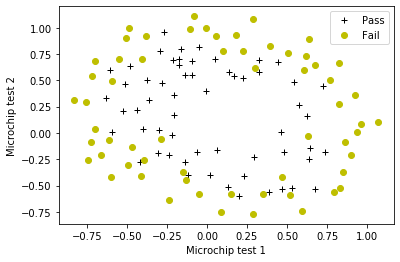

In [0]:
print("Plotting data with + indicating (y = 1) examples and o indicating",
" (y =0) examples.")
fig, ax = plotData(X, y)
ax.legend(['Pass', 'Fail'])
# Labels
ax.set_xlabel('Microchip test 1')
ax.set_ylabel('Microchip test 2')
fig.show()


Defining and Plotting Sigmoid Function.

In [0]:
def sigmoid(z):
    return 1.0/(1 +  np.e**(-z))

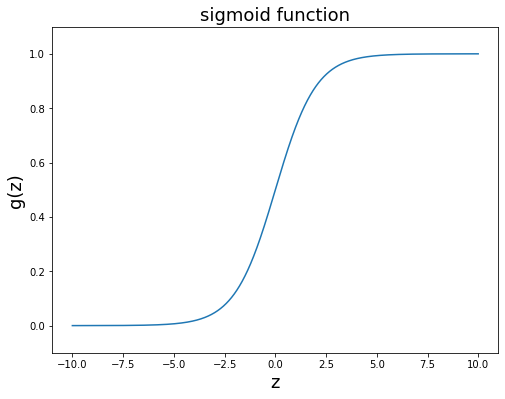

In [0]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(np.arange(-10, 10, step=0.01),
        sigmoid(np.arange(-10, 10, step=0.01)))
ax.set_ylim((-0.1,1.1))
ax.set_xlabel('z', fontsize=18)
ax.set_ylabel('g(z)', fontsize=18)
ax.set_title('sigmoid function', fontsize=18)
plt.show()

Defining Cost Function based on input features and assumption of initial theta values

In [0]:
def costFunctionReg(theta,X,y,reg_param):
    m = len(y) 
    J =((np.sum(-y*np.log(sigmoid(np.dot(X,theta)))-
       (1-y)*(np.log(1-sigmoid(np.dot(X,theta))))))/m +
       (reg_param/m)*np.sum(theta**2))
    # Non-regularized 
    grad_0 = (np.sum((sigmoid(np.dot(X,theta))-y)[:,None]*X,axis=0)/m)
    # Regularized
    grad_reg = grad_0 + (reg_param/m)*theta
    # Replace gradient for theta_0 with non-regularized gradient
    grad_reg[0] = grad_0[0] 
    return (J,grad_reg)


Defining feature vector function for mapping x1 and x2 polynomial features (higher order)

In [0]:
def mapFeatureVector(X1,X2):
    """
    Feature mapping function to polynomial features. Maps the two features
    X1,X2 to quadratic features used in the regularization exercise. X1, X2
    must be the same size.returns new feature array with interactions and quadratic terms
    """
    
    degree = 6
    output_feature_vec = np.ones(len(X1))[:,None]
    for i in range(1,7):
        for j in range(i+1):
            new_feature = np.array(X1**(i-j)*X2**j)[:,None]
            output_feature_vec = np.hstack((output_feature_vec,new_feature))
    return output_feature_vec


Preprocessing X and Initial Theta values and defining regularization parameter lambda as reg_param

In [0]:
## Part 1 -- Regularized Logistic Regression
X = mapFeatureVector(X[:,0],X[:,1])
initial_theta = np.zeros(len(X[0,:]))
# Set regularization parameter to 1
reg_param = 1.0

In [0]:
print(X[:5])

[[ 1.00000000e+00  5.12670000e-02  6.99560000e-01  2.62830529e-03
   3.58643425e-02  4.89384194e-01  1.34745327e-04  1.83865725e-03
   2.50892595e-02  3.42353606e-01  6.90798869e-06  9.42624411e-05
   1.28625106e-03  1.75514423e-02  2.39496889e-01  3.54151856e-07
   4.83255257e-06  6.59422333e-05  8.99809795e-04  1.22782870e-02
   1.67542444e-01  1.81563032e-08  2.47750473e-07  3.38066048e-06
   4.61305487e-05  6.29470940e-04  8.58939846e-03  1.17205992e-01]
 [ 1.00000000e+00 -9.27420000e-02  6.84940000e-01  8.60107856e-03
  -6.35227055e-02  4.69142804e-01 -7.97681228e-04  5.89122275e-03
  -4.35092419e-02  3.21334672e-01  7.39785525e-05 -5.46363780e-04
   4.03513411e-03 -2.98012201e-02  2.20094970e-01 -6.86091891e-06
   5.06708697e-05 -3.74226408e-04  2.76382476e-03 -2.04120477e-02
   1.50751849e-01  6.36295342e-07 -4.69931780e-06  3.47065055e-05
  -2.56322636e-04  1.89305413e-03 -1.39810280e-02  1.03255971e-01]
 [ 1.00000000e+00 -2.13710000e-01  6.92250000e-01  4.56719641e-02
  -1.479

Printing and testing of X and y shapes and theta shapes

In [0]:
print(X.shape), print(y.shape), print(initial_theta.shape)

(118, 28)
(118,)
(28,)


(None, None, None)

Calculating Cost and Regularized gradient descent based on parameters.

In [0]:
cost, grad_reg = costFunctionReg(initial_theta, X, y,reg_param)

In [0]:
print('Cost at initial theta (zeros): \n', cost)
print('Gradient at initial theta (zeros): \n',grad_reg)


Cost at initial theta (zeros): 
 0.6931471805599454
Gradient at initial theta (zeros): 
 [8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02 3.76648474e-02 1.83559872e-02 7.32393391e-03
 8.19244468e-03 2.34764889e-02 3.93486234e-02 2.23923907e-03
 1.28600503e-02 3.09593720e-03 3.93028171e-02 1.99707467e-02
 4.32983232e-03 3.38643902e-03 5.83822078e-03 4.47629067e-03
 3.10079849e-02 3.10312442e-02 1.09740238e-03 6.31570797e-03
 4.08503006e-04 7.26504316e-03 1.37646175e-03 3.87936363e-02]


Optimizing cost function as per scipy minimize function.

In [0]:
# Optimize for theta letting python choose method
res = minimize(costFunctionReg,
	       initial_theta,
               method='Newton-CG',
	       args=(X,y,reg_param),
	       jac=True, 
	       tol=1e-6,
	       options={'maxiter':400,
			'disp':True})


         Current function value: 0.586443
         Iterations: 4
         Function evaluations: 32
         Gradient evaluations: 52
         Hessian evaluations: 0


Updating theta values based on optimized cost.

In [0]:
theta = res.x

Printing theta values for higher order polynomial features of x1 and x2.

In [0]:
print(theta)

[ 1.01722923  0.16968737  0.79580858 -1.4336498  -0.53566806 -0.83116482
 -0.10604328 -0.22414935 -0.25291136 -0.22237155 -1.11536445 -0.06393938
 -0.40707549 -0.15558659 -0.89566513 -0.31529924 -0.14323098 -0.06765798
 -0.17860176 -0.18203622 -0.51586873 -0.83990234 -0.01102172 -0.20391598
 -0.00590762 -0.22299708 -0.07756428 -0.83618482]


Plotting Decision Boundary based on updated values of theta.

In [0]:
def plotDecisionBoundary(theta,X,y):
    """X is asssumed to be either:
        1) Mx3 matrix where the first column is all ones for the intercept
        2) MxN with N>3, where the first column is all ones
    """
    fig, ax = plotData(X[:,1:],y)
# Create grid space
    u = np.linspace(-1,1.5,50)
    v = np.linspace(-1,1.5,50)
    z = np.zeros((len(u),len(v)))
# Evaluate z = theta*x over values in the gridspace
    for i in range(len(u)):
        for j in range(len(v)):
            z[i][j] = np.dot(mapFeatureVector(np.array([u[i]]),np.array([v[j]])),theta) 
# Plot contour
    z = z.T
    ax.contour(u,v,z,levels=[0])
    return (fig,ax)


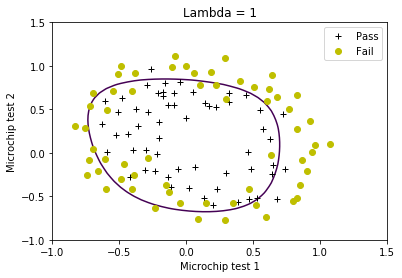

In [0]:
fig, ax = plotDecisionBoundary(theta,X,y)
ax.legend(['Pass', 'Fail','Decision Boundary'])
# Labels
ax.set_xlabel('Microchip test 1')
ax.set_ylabel('Microchip test 2')
ax.set_title('Lambda = 1')
plt.show()

Here we can observe the decision boundary based on regularization parameter as value of 1.

Later we will understand how regularization value can impact the decision boundary and can cause overfitting and underfitting also.

Lets redefine regularization parameter as zero and see if my decision boundary does any overfitting or not.

In [0]:
reg_param = 0.0
cost, grad_reg = costFunctionReg(initial_theta, X, y,reg_param)

In [0]:
res = minimize(costFunctionReg,
	       initial_theta,
               method='Newton-CG',
	       args=(X,y,reg_param),
	       jac=True, 
	       tol=1e-6,
	       options={'maxiter':400,
			'disp':True})


         Current function value: 0.267781
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 2059
         Hessian evaluations: 0


Here, we can see that my decision boundary is performing overfitting of the model.

Overfitting works well with current data but perform poorly on the new test data.

Regularization parameter is used to control overfitting of the model trained based on train data.

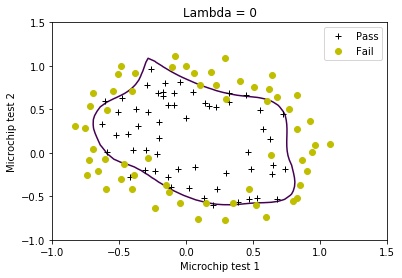

In [0]:
theta = res.x
fig, ax = plotDecisionBoundary(theta,X,y)
ax.legend(['Pass', 'Fail','Decision Boundary'])
# Labels
ax.set_xlabel('Microchip test 1')
ax.set_ylabel('Microchip test 2')
ax.set_title('Lambda = 0')
plt.show()

Lets check the regularization now with new value of 10. (Higher value than 1)

In [0]:
reg_param = 10.0
cost, grad_reg = costFunctionReg(initial_theta, X, y,reg_param)

In [0]:
res = minimize(costFunctionReg,
	       initial_theta,
               method='Newton-CG',
	       args=(X,y,reg_param),
	       jac=True, 
	       tol=1e-6,
	       options={'maxiter':400,
			'disp':True})


         Current function value: 0.672251
         Iterations: 3
         Function evaluations: 27
         Gradient evaluations: 32
         Hessian evaluations: 0


Here we can see the model is performing underfitting because of higher penalizing of the high order polynomial features and providing less accuracy.

So the selection of regularization parameter is very important to perform model the better one in predicting the future data.

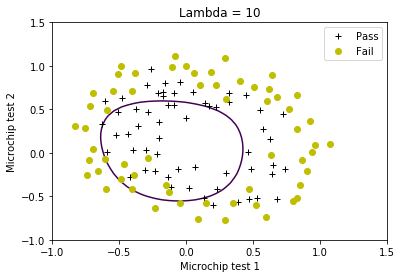

In [0]:
theta = res.x

fig, ax = plotDecisionBoundary(theta,X,y)
ax.legend(['Pass', 'Fail','Decision Boundary'])
# Labels
ax.set_xlabel('Microchip test 1')
ax.set_ylabel('Microchip test 2')
ax.set_title('Lambda = 10')

plt.show()
